<h1 style="text-align:center; font-size: 4.5em;">Brain Stroke Classification Testing</h1>

## Attribute Information
1) gender: "Male", "Female" or "Other"
 
2) age: age of the patient
 
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
 
4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 5) Ever-married: "No" or "Yes"
 
6) work type: "children", "Govtjov", "Never worked", "Private" or "Self-employed"
 
7) Residencetype: "Rural" or "Urban"
 
8) avg glucose level: average glucose level in blood
 
9) BMI: body mass index
 
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
 
11) stroke: 1 if the patient had a stroke or 0 if not
 
Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Import libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Optional libraries if you want to remove the Warnings while implementing the models:
import warnings
warnings.filterwarnings('ignore')

# Extensive EDA

### Data check

In [3]:
# Scenario 1 : Brain Stroke prediction (classification)

brain_df = pd.read_csv('brain_stroke_data.csv')
brain_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,46.0,0,0,Yes,Private,Urban,78.79,42.4,smokes,0
1,Female,65.0,0,0,Yes,Self-employed,Urban,248.24,27.0,smokes,0
2,Male,70.0,1,0,Yes,Self-employed,Rural,118.81,26.0,smokes,0
3,Male,47.0,0,0,Yes,Private,Urban,111.84,33.7,Unknown,0
4,Male,31.0,0,0,Yes,Govt_job,Urban,65.70,30.4,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4477,Male,55.0,0,0,Yes,Private,Rural,56.87,28.9,formerly smoked,0
4478,Female,74.0,0,0,Yes,Self-employed,Urban,88.62,28.5,formerly smoked,0
4479,Female,48.0,0,0,No,Govt_job,Urban,101.41,20.7,smokes,0
4480,Female,31.0,0,0,Yes,Private,Urban,56.48,26.2,formerly smoked,0


In [4]:
print(brain_df['gender'].unique())
print(brain_df['work_type'].unique())
print(brain_df['Residence_type'].unique())
print(brain_df['smoking_status'].unique())


['Female' 'Male']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['smokes' 'Unknown' 'formerly smoked' 'never smoked']


In [5]:
brain_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4482 entries, 0 to 4481
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4482 non-null   object 
 1   age                4482 non-null   float64
 2   hypertension       4482 non-null   int64  
 3   heart_disease      4482 non-null   int64  
 4   ever_married       4482 non-null   object 
 5   work_type          4482 non-null   object 
 6   Residence_type     4482 non-null   object 
 7   avg_glucose_level  4482 non-null   float64
 8   bmi                4482 non-null   float64
 9   smoking_status     4482 non-null   object 
 10  stroke             4482 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 385.3+ KB


In [6]:
brain_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- No null values, data is fully clean here

In [7]:
brain_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000
mean,43.446693,0.098394,0.054663,105.761430,28.466064,0.049755
std,22.592327,0.297879,0.227347,44.943627,6.764658,0.217462
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,26.000000,0.000000,0.000000,77.192500,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.637500,32.575000,0.000000
max,82.000000,1.000000,1.000000,267.760000,48.900000,1.000000


In [8]:
## Analysis of 0s in the dataset
total_counts = brain_df.shape[0]
zero_counts = brain_df.eq(0).sum()
zero_percentages = (zero_counts / total_counts) * 100

# print(f"Number of 0's in each column and its percentage: {zero_counts}, {zero_percentages} %")
# # print(zero_counts, zero_percentages)

# Combine zero counts and percentages for each column
column_info = zip(zero_counts, zero_percentages)

# Print the number of zeros and their percentages in each column
print("Number of 0's in each column and its percentage:")
for column, (zero_count, zero_percentage) in zip(brain_df.columns, column_info):
    display(f"{column}: {zero_count}, {zero_percentage:.2f}%")

Number of 0's in each column and its percentage:


'gender: 0, 0.00%'

'age: 0, 0.00%'

'hypertension: 4041, 90.16%'

'heart_disease: 4237, 94.53%'

'ever_married: 0, 0.00%'

'work_type: 0, 0.00%'

'Residence_type: 0, 0.00%'

'avg_glucose_level: 0, 0.00%'

'bmi: 0, 0.00%'

'smoking_status: 0, 0.00%'

'stroke: 4259, 95.02%'

- Data is valid, since there are no irregular 0's happening in key variables such as 'bmi' and 'avg_glucose_level'

### Explanatory data analysis

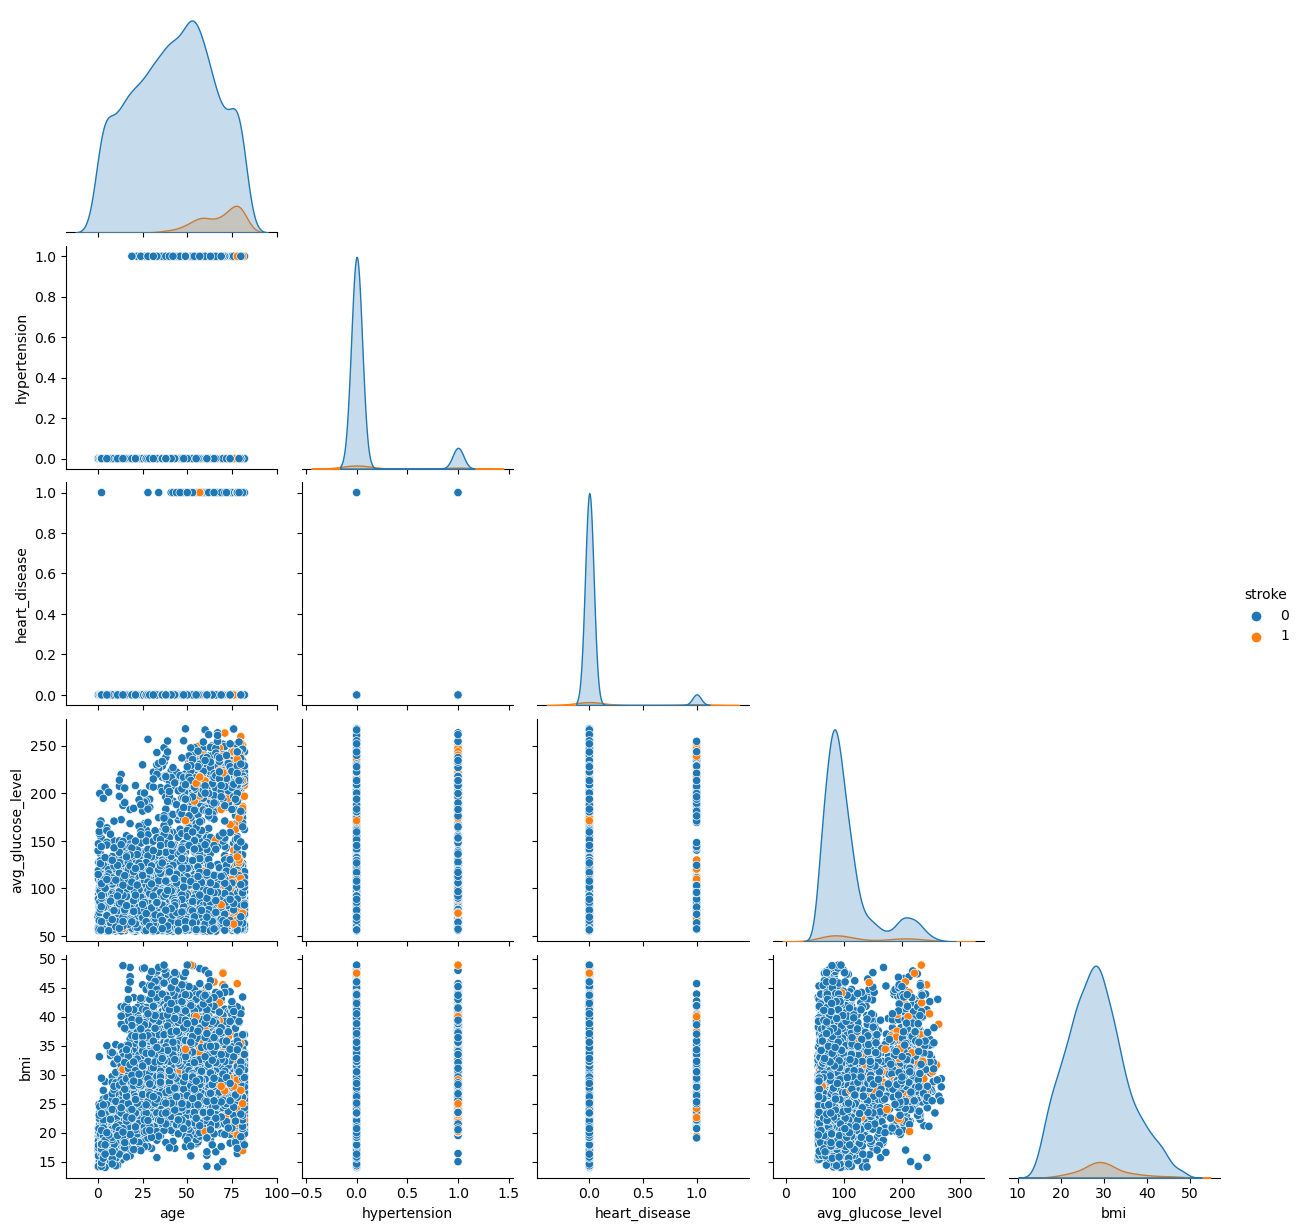

In [9]:
sns.pairplot(brain_df, hue='stroke', corner=True)

- Attempt to find out most relevant variables for further analysis, in this case being 'bmi', 'avg_glucose_level' and 'age'

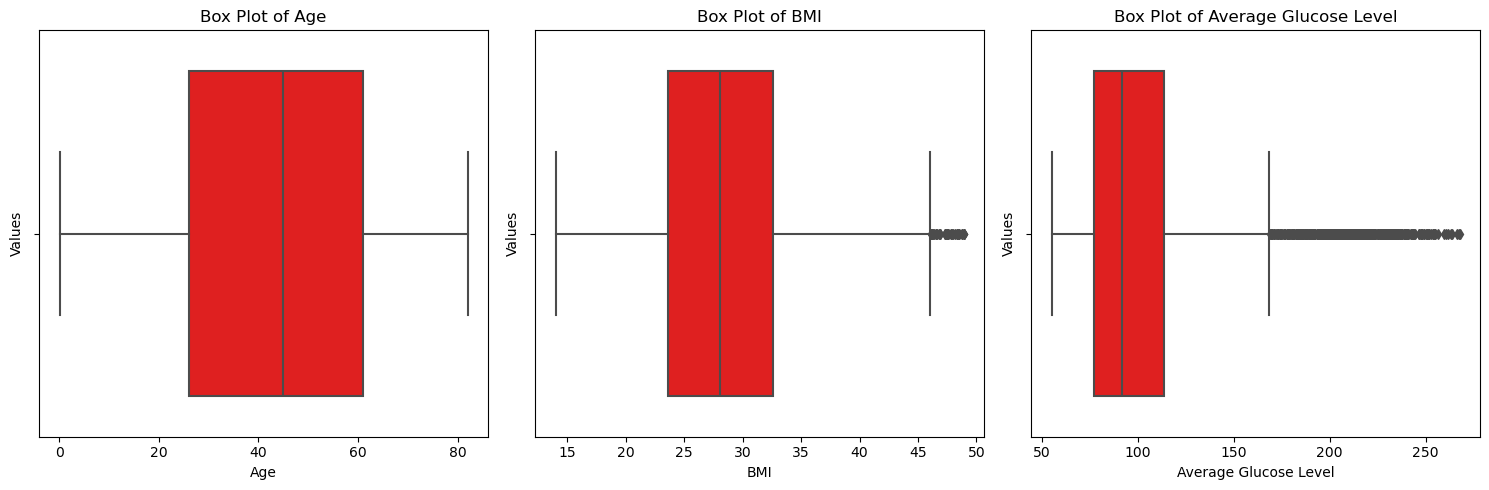

In [10]:
# Create subplots with 1 row and 3 columns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 
# Create box plots for age, BMI, and avg_glucose_level
sns.boxplot(ax=axes[0], x=brain_df['age'], color = 'red')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Values')
axes[0].set_title('Box Plot of Age')
 
sns.boxplot(ax=axes[1], x=brain_df['bmi'], color ='red')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Values')
axes[1].set_title('Box Plot of BMI')
 
sns.boxplot(ax=axes[2], x=brain_df['avg_glucose_level'],color = 'red')
axes[2].set_xlabel('Average Glucose Level')
axes[2].set_ylabel('Values')
axes[2].set_title('Box Plot of Average Glucose Level')
 
# Adjust layout
plt.tight_layout()
plt.show()

- Some outliers being seen in 'bmi' and 'avg_glucose_level'

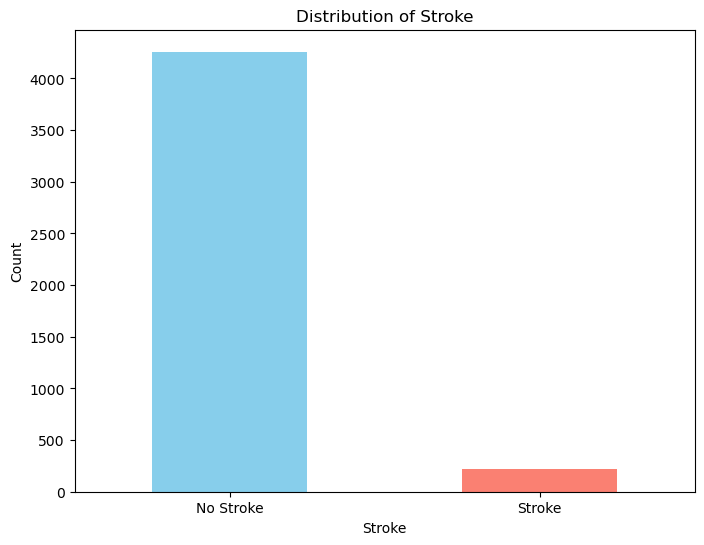

In [11]:
# Distribution of target variable: 
import matplotlib.pyplot as plt

# Count the frequency of each class in the 'stroke' variable
stroke_counts = brain_df['stroke'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
stroke_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Stroke', 'Stroke'], rotation=0)
plt.show()



- Dataset is very imbalanced which will affect our modelling

In [12]:
# Find the imbalance ratio 

## Calculate the number of instances in each class
num_class_0 = (brain_df['stroke'] == 0).sum()
num_class_1 = (brain_df['stroke'] == 1).sum()

# Calculate the imbalance ratio
imbalance_ratio = num_class_0 / num_class_1

print("Imbalance ratio:", imbalance_ratio)


Imbalance ratio: 19.09865470852018


# Normalise the data

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create DataFrame
df = pd.DataFrame(brain_df)

# Instantiate OneHotEncoder
encoder = OneHotEncoder()

# Encode categorical features
encoded_features = encoder.fit_transform(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']), dtype = 'int')

# Concatenate the encoded DataFrame with the original DataFrame
encoded_df = pd.concat([df.drop(columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']), encoded_df], axis=1)

# Display the encoded DataFrame
display(encoded_df)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,46.0,0,0,78.79,42.4,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
1,65.0,0,0,248.24,27.0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2,70.0,1,0,118.81,26.0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
3,47.0,0,0,111.84,33.7,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0
4,31.0,0,0,65.70,30.4,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,55.0,0,0,56.87,28.9,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0
4478,74.0,0,0,88.62,28.5,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
4479,48.0,0,0,101.41,20.7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1
4480,31.0,0,0,56.48,26.2,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0


- Encode the categorical variables 

In [14]:
# Compute correlation matrix
encoded_df_c = encoded_df.corr()
encoded_df_c

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.279843,0.268319,0.236010,0.368143,0.242458,0.034184,-0.034184,-0.675877,0.675877,0.124724,0.109214,0.329523,-0.636935,-0.022905,0.022905,-0.372323,0.233136,0.118702,0.071621
hypertension,0.279843,1.000000,0.101804,0.174468,0.163971,0.124224,-0.019463,0.019463,-0.170025,0.170025,0.020290,-0.009043,0.114295,-0.130124,0.003797,-0.003797,-0.143671,0.060556,0.065382,0.031943
heart_disease,0.268319,0.101804,1.000000,0.166204,0.061354,0.130046,-0.089737,0.089737,-0.123533,0.123533,0.008309,-0.010992,0.092398,-0.091840,-0.004435,0.004435,-0.066088,0.066760,-0.022372,0.044207
avg_glucose_level,0.236010,0.174468,0.166204,1.000000,0.180692,0.131122,-0.049824,0.049824,-0.156405,0.156405,0.004052,0.021628,0.061918,-0.102094,-0.015259,0.015259,-0.102713,0.072170,0.026617,0.019801
bmi,0.368143,0.163971,0.061354,0.180692,1.000000,0.059205,0.017901,-0.017901,-0.370698,0.370698,0.086904,0.215429,0.078618,-0.483194,-0.020867,0.020867,-0.290726,0.117981,0.107792,0.101846
stroke,0.242458,0.124224,0.130046,0.131122,0.059205,1.000000,-0.006990,0.006990,-0.110725,0.110725,0.002262,0.004318,0.070176,-0.084114,-0.017365,0.017365,-0.054255,0.066308,-0.008157,0.010910
gender_Female,0.034184,-0.019463,-0.089737,-0.049824,0.017901,-0.006990,1.000000,-1.000000,-0.035394,0.035394,0.022633,0.028856,0.029222,-0.095744,-0.001100,0.001100,-0.059385,-0.043747,0.098362,-0.010609
gender_Male,-0.034184,0.019463,0.089737,0.049824,-0.017901,0.006990,-1.000000,1.000000,0.035394,-0.035394,-0.022633,-0.028856,-0.029222,0.095744,0.001100,-0.001100,0.059385,0.043747,-0.098362,0.010609
ever_married_No,-0.675877,-0.170025,-0.123533,-0.156405,-0.370698,-0.110725,-0.035394,0.035394,1.000000,-1.000000,-0.125213,-0.147665,-0.193721,0.546864,0.007063,-0.007063,0.327163,-0.173439,-0.098090,-0.103525
ever_married_Yes,0.675877,0.170025,0.123533,0.156405,0.370698,0.110725,0.035394,-0.035394,-1.000000,1.000000,0.125213,0.147665,0.193721,-0.546864,-0.007063,0.007063,-0.327163,0.173439,0.098090,0.103525


In [15]:
# Compute correlation of 'stroke' column with other columns
stroke_correlation = encoded_df.corr()['stroke'].drop('stroke')

# Display correlation values
display(stroke_correlation)


age                               0.242458
hypertension                      0.124224
heart_disease                     0.130046
avg_glucose_level                 0.131122
bmi                               0.059205
gender_Female                    -0.006990
gender_Male                       0.006990
ever_married_No                  -0.110725
ever_married_Yes                  0.110725
work_type_Govt_job                0.002262
work_type_Private                 0.004318
work_type_Self-employed           0.070176
work_type_children               -0.084114
Residence_type_Rural             -0.017365
Residence_type_Urban              0.017365
smoking_status_Unknown           -0.054255
smoking_status_formerly smoked    0.066308
smoking_status_never smoked      -0.008157
smoking_status_smokes             0.010910
Name: stroke, dtype: float64

- There aren't any strong correlation with stroke being seen in here with the other encoded variables

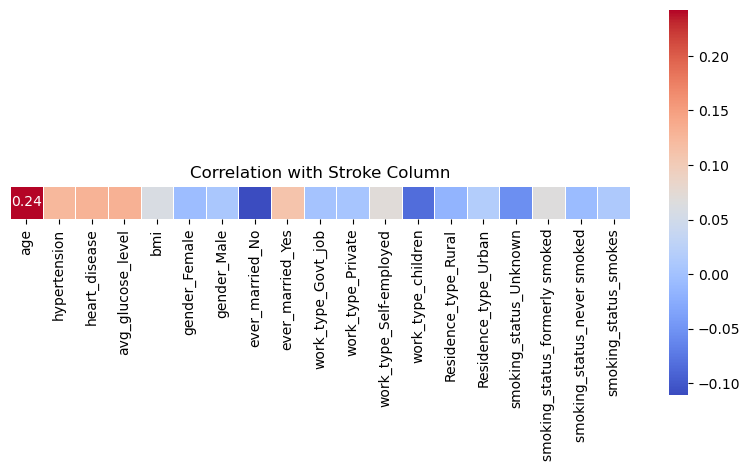

In [16]:
# Reshape the correlation series into a DataFrame for heatmap plotting
stroke_correlation_df = stroke_correlation.to_frame().T

# Define the desired order of columns
column_order = stroke_correlation_df.columns

# Plot the heatmap with specified column order
plt.figure(figsize=(10, 10))
sns.heatmap(stroke_correlation_df, linewidths=.5, annot=True, cmap='coolwarm', fmt=".2f", square=True, 
            cbar_kws={"shrink": .5}, xticklabels=column_order, yticklabels=False)  # Set yticklabels to False if desired
plt.title('Correlation with Stroke Column')
plt.show()


# Train - Test split

- The train-test split is a crucial step in machine learning model development, primarily for evaluating the model's performance and generalisation ability

In [17]:
# split information into dependent independent (X, y)
from sklearn.model_selection import train_test_split
X = encoded_df.drop(columns=['stroke'])
y = encoded_df['stroke']

display(X,y)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,46.0,0,0,78.79,42.4,1,0,0,1,0,1,0,0,0,1,0,0,0,1
1,65.0,0,0,248.24,27.0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2,70.0,1,0,118.81,26.0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
3,47.0,0,0,111.84,33.7,0,1,0,1,0,1,0,0,0,1,1,0,0,0
4,31.0,0,0,65.70,30.4,0,1,0,1,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,55.0,0,0,56.87,28.9,0,1,0,1,0,1,0,0,1,0,0,1,0,0
4478,74.0,0,0,88.62,28.5,1,0,0,1,0,0,1,0,0,1,0,1,0,0
4479,48.0,0,0,101.41,20.7,1,0,1,0,1,0,0,0,0,1,0,0,0,1
4480,31.0,0,0,56.48,26.2,1,0,0,1,0,1,0,0,0,1,0,1,0,0


0       0
1       0
2       0
3       0
4       0
       ..
4477    0
4478    0
4479    0
4480    0
4481    0
Name: stroke, Length: 4482, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train
len(X_train), len(X_test), len(y_test), len(y_train)

(3585, 897, 897, 3585)

- Scaling the data ensures that the machine learning algorithm can effectively learn from the data and produce better results, especially for algorithms sensitive to feature scales.

In [19]:
# Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


In [20]:
# Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
ss

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

X_train, X_test

(array([[ 0.92014495, -0.32736053,  4.19227021, ...,  2.22601651,
         -0.76752573, -0.43571092],
        [-0.89091613, -0.32736053, -0.23853424, ..., -0.44923297,
         -0.76752573, -0.43571092],
        [-0.27250503, -0.32736053, -0.23853424, ..., -0.44923297,
          1.30288792, -0.43571092],
        ...,
        [-0.0074717 , -0.32736053, -0.23853424, ...,  2.22601651,
         -0.76752573, -0.43571092],
        [ 0.43425052, -0.32736053, -0.23853424, ..., -0.44923297,
         -0.76752573,  2.29509967],
        [-0.13998836, -0.32736053, -0.23853424, ..., -0.44923297,
         -0.76752573,  2.29509967]]),
 array([[-1.81853278, -0.32736053, -0.23853424, ..., -0.44923297,
         -0.76752573, -0.43571092],
        [-1.55349945, -0.32736053, -0.23853424, ..., -0.44923297,
         -0.76752573, -0.43571092],
        [-0.89091613, -0.32736053, -0.23853424, ..., -0.44923297,
          1.30288792, -0.43571092],
        ...,
        [ 1.09683384, -0.32736053, -0.23853424, ..., -

## Using KNN

In [21]:
# Calculate k
import math
print('k-value is: ',math.sqrt(len(y_test)))


k-value is:  29.949958263743873


In [22]:
# Create KNN Object
classifier = KNeighborsClassifier(n_neighbors=30, metric = 'euclidean')

# Train model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=30)

### Using predictions

In [23]:
y_pred = classifier.predict(X_test)
y_pred[0:10], y_test[0:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 157     0
 3970    0
 1018    0
 1117    0
 731     0
 2677    0
 2359    0
 3888    0
 1038    0
 1434    0
 Name: stroke, dtype: int64)

### Confusion Matrix

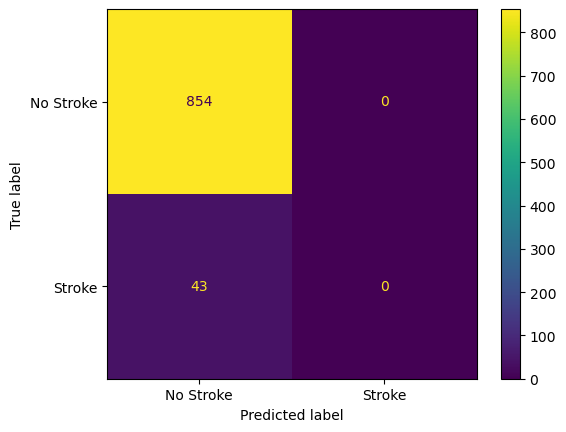

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),
display_labels=['No Stroke','Stroke']).plot()

- Confusion matrix doesn't produce any results for Stroke which makes it highly unreliable

### F1-Score

In [25]:
# F1 score
print('f1-score: ',f1_score(y_test, y_pred))

f1-score:  0.0


### Accuracy Score

In [26]:
print('Accuracy score: ',accuracy_score(y_test, y_pred))

Accuracy score:  0.9520624303232998


- The scores suggest the model is performing well in overall accuracy, so is correctly classifying the majority of instances
- However the f-1 score being at 0 shows it's failing to correctly identify instances of at least one class

- This could suggest either 1 of 2 things: 
    - The model is is not effectively capturing the characteristics of certain classes
    - The dataset is highly inbalanced

- To improve the model, you might consider:

    - Investigating the class with an F1-score of 0 to understand why the model is failing to correctly classify instances of that class.
    - Collecting more data, if possible, especially for the minority class if the dataset is imbalanced.
    - Trying different classification algorithms or adjusting hyperparameters to see if the model performance improves.
    - Using techniques such as oversampling, undersampling, or class weights to address class imbalance issues.
    - Examining feature importance to understand which features are most influential in the model's predictions.

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)


MSE:  0.04793756967670011
RMSE:  0.2189464995762666
R2:  -0.050351288056206034


- Despite the MSE and RMSE being low is ideal, the R2 score being close to 0 instead of 1 makes the model unreliable

### Reevaluating K Value

In [28]:
error_rate = []
 
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

error_rate

[0.08807134894091416,
 0.05351170568561873,
 0.06465997770345597,
 0.04793756967670011,
 0.04905239687848383,
 0.04793756967670011,
 0.04905239687848383,
 0.046822742474916385,
 0.046822742474916385,
 0.04793756967670011,
 0.046822742474916385,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011]

Text(0, 0.5, 'Error Rate')

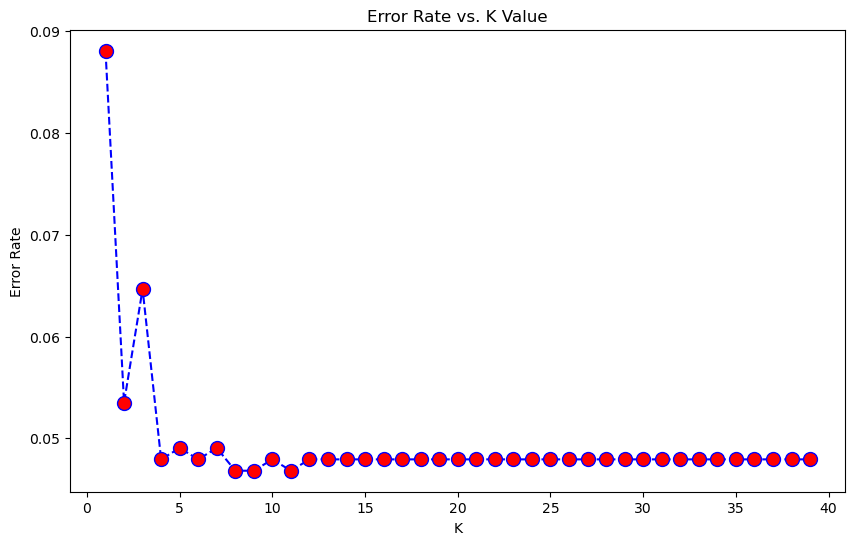

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

When K = 30
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       854
           1       0.00      0.00      0.00        43

    accuracy                           0.95       897
   macro avg       0.48      0.50      0.49       897
weighted avg       0.91      0.95      0.93       897



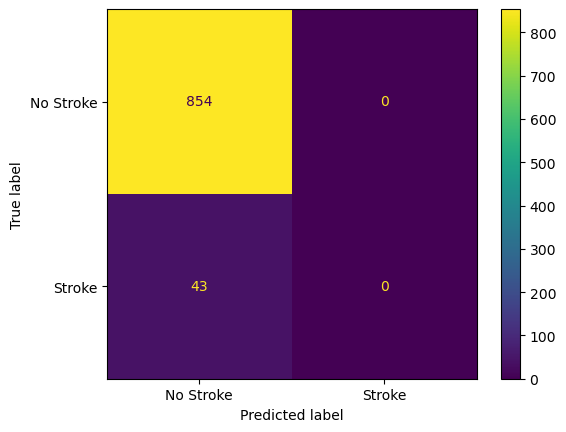

In [30]:
classifier = KNeighborsClassifier(n_neighbors = 30, metric = 'euclidean')
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
y_pred[0:10], y_test[0:10]
 

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),
display_labels=['No Stroke','Stroke']).plot()
 
print('When K = 30')  
print(classification_report(y_test, y_pred))

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)

MSE:  0.04793756967670011
RMSE:  0.2189464995762666
R2:  -0.050351288056206034


- No major changes encountered here

# Resampling Techniques

In [32]:
! pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


### Oversampling

In [33]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data only to avoid data leakage
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the resampled data


In [34]:
len(X_train_resampled), len(X_test), len(y_test), len(y_train_resampled)

(6810, 897, 897, 6810)

In [35]:
X_train_resampled, y_train_resampled

(array([[ 0.92014495, -0.32736053,  4.19227021, ...,  2.22601651,
         -0.76752573, -0.43571092],
        [-0.89091613, -0.32736053, -0.23853424, ..., -0.44923297,
         -0.76752573, -0.43571092],
        [-0.27250503, -0.32736053, -0.23853424, ..., -0.44923297,
          1.30288792, -0.43571092],
        ...,
        [ 1.67107272, -0.32736053, -0.23853424, ..., -0.44923297,
          1.30288792, -0.43571092],
        [ 0.6109394 ,  3.05473601, -0.23853424, ..., -0.44923297,
         -0.76752573,  2.29509967],
        [ 0.78762829,  3.05473601,  4.19227021, ..., -0.44923297,
         -0.76752573,  2.29509967]]),
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6805    1
 6806    1
 6807    1
 6808    1
 6809    1
 Name: stroke, Length: 6810, dtype: int64)

In [36]:
y_pred = classifier.predict(X_test)
y_pred[0:10], y_test[0:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 157     0
 3970    0
 1018    0
 1117    0
 731     0
 2677    0
 2359    0
 3888    0
 1038    0
 1434    0
 Name: stroke, dtype: int64)

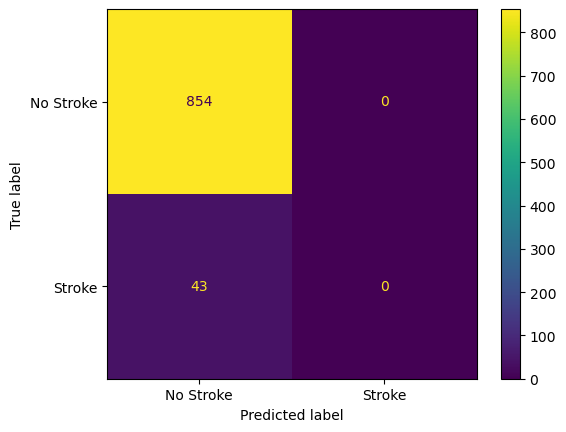

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),
display_labels=['No Stroke','Stroke']).plot()

In [38]:
from sklearn.metrics import classification_report

# Train the classifier using the resampled training data
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original (unbalanced) test data
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.69      0.81       854
           1       0.09      0.60      0.16        43

    accuracy                           0.69       897
   macro avg       0.53      0.65      0.48       897
weighted avg       0.93      0.69      0.78       897



In [39]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)

MSE:  0.31438127090301005
RMSE:  0.5606971293871675
R2:  -5.888350307717444


In [40]:
error_rate = []
 
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

error_rate

[0.08807134894091416,
 0.05351170568561873,
 0.06465997770345597,
 0.04793756967670011,
 0.04905239687848383,
 0.04793756967670011,
 0.04905239687848383,
 0.046822742474916385,
 0.046822742474916385,
 0.04793756967670011,
 0.046822742474916385,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011,
 0.04793756967670011]

Text(0, 0.5, 'Error Rate')

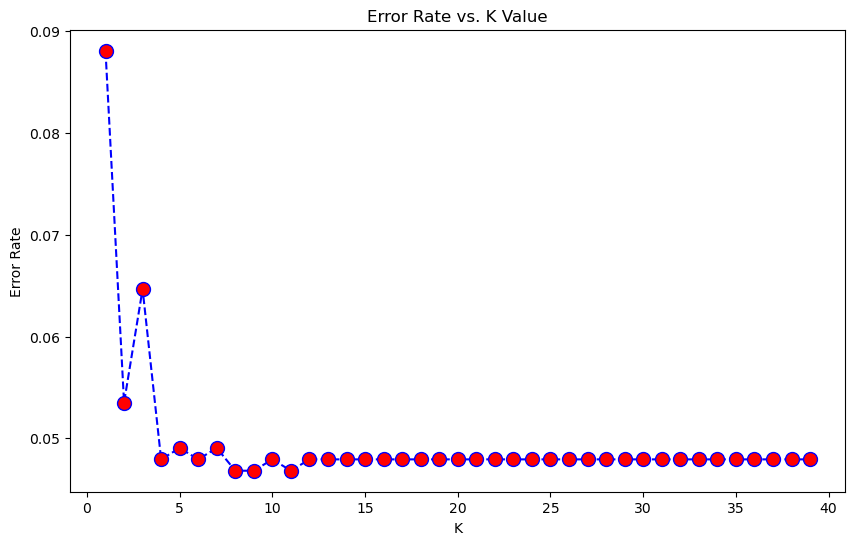

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Undersampling

In [42]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler for under-sampling
rus = RandomUnderSampler(random_state=42)

# Resample the training data only to avoid data leakage
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

X_train_resampled, y_train_resampled

(array([[ 0.3900783 , -0.32736053, -0.23853424, ..., -0.44923297,
         -0.76752573,  2.29509967],
        [ 1.31769495, -0.32736053,  4.19227021, ..., -0.44923297,
          1.30288792, -0.43571092],
        [ 1.0084894 , -0.32736053, -0.23853424, ..., -0.44923297,
         -0.76752573,  2.29509967],
        ...,
        [ 0.6109394 ,  3.05473601, -0.23853424, ..., -0.44923297,
          1.30288792, -0.43571092],
        [ 1.49438383, -0.32736053,  4.19227021, ..., -0.44923297,
          1.30288792, -0.43571092],
        [ 0.87597273, -0.32736053, -0.23853424, ...,  2.22601651,
         -0.76752573, -0.43571092]]),
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 355    1
 356    1
 357    1
 358    1
 359    1
 Name: stroke, Length: 360, dtype: int64)

In [43]:
len(X_train_resampled), len(X_test), len(y_test), len(y_train_resampled)

(360, 897, 897, 360)

In [44]:
X_train_resampled, y_train_resampled

(array([[ 0.3900783 , -0.32736053, -0.23853424, ..., -0.44923297,
         -0.76752573,  2.29509967],
        [ 1.31769495, -0.32736053,  4.19227021, ..., -0.44923297,
          1.30288792, -0.43571092],
        [ 1.0084894 , -0.32736053, -0.23853424, ..., -0.44923297,
         -0.76752573,  2.29509967],
        ...,
        [ 0.6109394 ,  3.05473601, -0.23853424, ..., -0.44923297,
          1.30288792, -0.43571092],
        [ 1.49438383, -0.32736053,  4.19227021, ..., -0.44923297,
          1.30288792, -0.43571092],
        [ 0.87597273, -0.32736053, -0.23853424, ...,  2.22601651,
         -0.76752573, -0.43571092]]),
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 355    1
 356    1
 357    1
 358    1
 359    1
 Name: stroke, Length: 360, dtype: int64)

In [45]:
y_pred = classifier.predict(X_test)
y_pred[0:10], y_test[0:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 157     0
 3970    0
 1018    0
 1117    0
 731     0
 2677    0
 2359    0
 3888    0
 1038    0
 1434    0
 Name: stroke, dtype: int64)

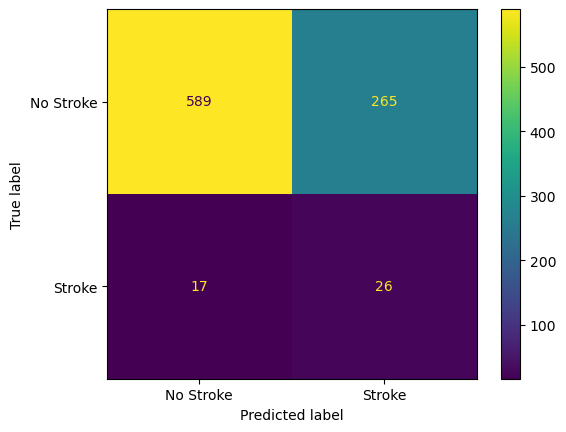

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),
display_labels=['No Stroke','Stroke']).plot()

In [47]:
from sklearn.metrics import classification_report

# Train the classifier using the resampled training data
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original (unbalanced) test data
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84       854
           1       0.09      0.51      0.16        43

    accuracy                           0.74       897
   macro avg       0.53      0.63      0.50       897
weighted avg       0.93      0.74      0.81       897



In [48]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)

MSE:  0.26421404682274247
RMSE:  0.514017554975258
R2:  -4.7891454713795545


### Undersampling produced better results, however would not be ideal due to valauble data not being used that the machine could learn from.
### Hence could focus on incorporating the oversampling method in tandem with other methods for better results

# Dtree and Random Forest Walk

In [49]:
# import decisiontreeclassifier from sklearn
from sklearn.tree import DecisionTreeClassifier
# create decisiontreeclassifier object
dtree = DecisionTreeClassifier()

In [50]:
# split information into dependent independent (X, y)
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = encoded_df.drop(columns=['stroke'])  # Features
y = encoded_df['stroke']  # Target variable


# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


display(X,y)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,46.0,0,0,78.79,42.4,1,0,0,1,0,1,0,0,0,1,0,0,0,1
1,65.0,0,0,248.24,27.0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2,70.0,1,0,118.81,26.0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
3,47.0,0,0,111.84,33.7,0,1,0,1,0,1,0,0,0,1,1,0,0,0
4,31.0,0,0,65.70,30.4,0,1,0,1,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,55.0,0,0,56.87,28.9,0,1,0,1,0,1,0,0,1,0,0,1,0,0
4478,74.0,0,0,88.62,28.5,1,0,0,1,0,0,1,0,0,1,0,1,0,0
4479,48.0,0,0,101.41,20.7,1,0,1,0,1,0,0,0,0,1,0,0,0,1
4480,31.0,0,0,56.48,26.2,1,0,0,1,0,1,0,0,0,1,0,1,0,0


0       0
1       0
2       0
3       0
4       0
       ..
4477    0
4478    0
4479    0
4480    0
4481    0
Name: stroke, Length: 4482, dtype: int64

In [51]:
# Get the number of samples in X_train, X_test, y_train, and y_test
num_samples_train = X_train.shape[0]
num_samples_test = X_test.shape[0]
num_samples_y_train = len(y_train)  # Since y_train is not a sparse array
num_samples_y_test = len(y_test)  # Since y_test is not a sparse array

print("Number of samples in X_train:", num_samples_train)
print("Number of samples in X_test:", num_samples_test)
print("Number of samples in y_train:", num_samples_y_train)
print("Number of samples in y_test:", num_samples_y_test)


Number of samples in X_train: 3585
Number of samples in X_test: 897
Number of samples in y_train: 3585
Number of samples in y_test: 897


In [52]:
# Instantiate RandomOverSampler for oversampling
ros = RandomOverSampler(random_state=42)
# Resample the training data using RandomOverSampler
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [53]:
# Train the classifier on the resampled data
dtree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [54]:
pred = dtree.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [55]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       854
           1       0.10      0.14      0.12        43

    accuracy                           0.90       897
   macro avg       0.53      0.54      0.53       897
weighted avg       0.91      0.90      0.91       897



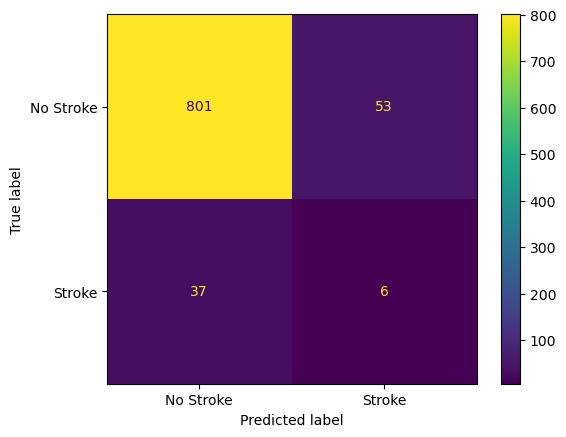

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,pred),
display_labels=['No Stroke','Stroke']).plot()

- Model better than KNN but not ideal with results

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)

MSE:  0.26421404682274247
RMSE:  0.514017554975258
R2:  -4.7891454713795545


### Tree Visualizations

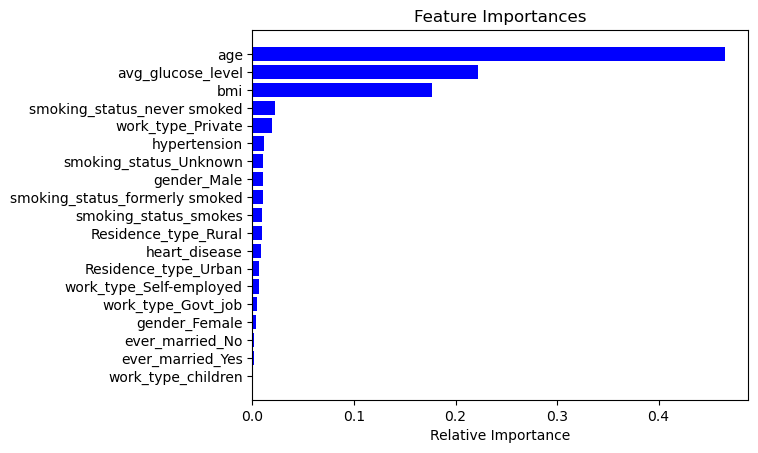

In [58]:
importances = dtree.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- This further emphasises the variables 'age', 'avg_glucose_level' and 'bmi' being the relevant variables to test stroke 

# SVM 

In [59]:
# split information into dependent independent (X, y)
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = encoded_df.drop(columns=['stroke']).values  # Features
y = encoded_df['stroke'].values  # Target variable


# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

display(X,y)


array([[46.,  0.,  0., ...,  0.,  0.,  1.],
       [65.,  0.,  0., ...,  0.,  0.,  1.],
       [70.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [48.,  0.,  0., ...,  0.,  0.,  1.],
       [31.,  0.,  0., ...,  1.,  0.,  0.],
       [38.,  0.,  0., ...,  0.,  1.,  0.]])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
print("Number of samples in X:", X.shape[0])
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in X_test:", X_test.shape[0])


Number of samples in X: 4482
Number of samples in X_train: 3585
Number of samples in X_test: 897


In [61]:
X_train

array([[29.,  0.,  0., ...,  0.,  0.,  1.],
       [36.,  0.,  0., ...,  0.,  0.,  1.],
       [59.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [76.,  0.,  1., ...,  1.,  0.,  0.],
       [35.,  0.,  0., ...,  0.,  0.,  1.],
       [47.,  0.,  0., ...,  0.,  0.,  1.]])

Cross-validation F1 scores: [0.19661017 0.24150943 0.224      0.16923077 0.19685039]
Mean F1 score: 0.20564015327706925
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       848
           1       0.14      0.84      0.25        49

    accuracy                           0.72       897
   macro avg       0.57      0.78      0.54       897
weighted avg       0.94      0.72      0.80       897



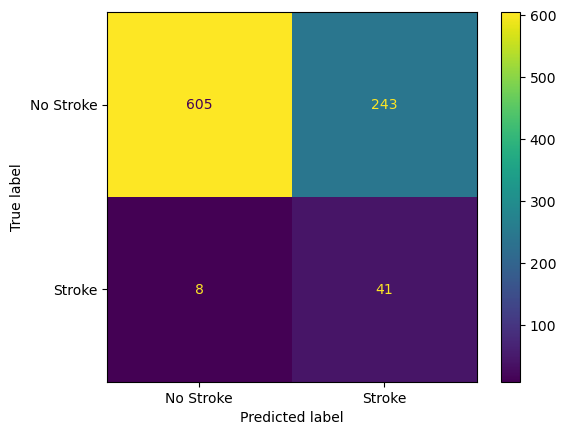

In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Define SVM classifier with class weighting
svm = SVC(class_weight='balanced')

# Perform cross-validation on the training data
scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='f1')

# Print cross-validation scores
print("Cross-validation F1 scores:", scores)
print("Mean F1 score:", scores.mean())

# Train SVM classifier on the entire training dataset
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion matrix 

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),
display_labels=['No Stroke','Stroke']).plot()

- After balancing the classes, the SVM model has shown far better improvement in its response to return positive strokes 

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)

MSE:  0.2798216276477146
RMSE:  0.5289816893312231
R2:  -4.418439545629574


### Apply imbalance ratio

              precision    recall  f1-score   support

           0       0.99      0.72      0.83       848
           1       0.15      0.84      0.25        49

    accuracy                           0.73       897
   macro avg       0.57      0.78      0.54       897
weighted avg       0.94      0.73      0.80       897



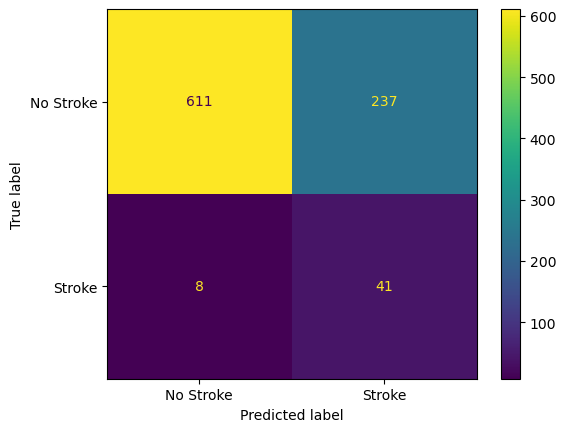

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define class weights based on the imbalance ratio
classweights = {0: 1, 1: 20}  # Adjusted based on the imbalance ratio in your dataset

# Create SVC classifier with customized class weights
svm = SVC(class_weight=classweights)

# Train the classifier
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),
display_labels=['No Stroke','Stroke']).plot()

- No major improvement from prior SVM model 

### Advance sampling techniques

- SMOTEENN and oversampling

              precision    recall  f1-score   support

           0       0.99      0.69      0.81       848
           1       0.14      0.86      0.24        49

    accuracy                           0.70       897
   macro avg       0.56      0.77      0.52       897
weighted avg       0.94      0.70      0.78       897



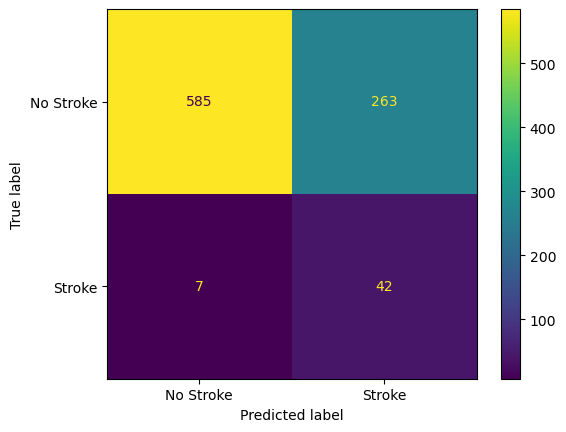

In [65]:
from imblearn.combine import SMOTEENN
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix


# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data only to avoid data leakage
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote_enn.fit_resample(X_train_resampled, y_train_resampled)

# Create and train the classifier on the resampled data
svm = SVC()
svm.fit(X_resampled, y_resampled)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),
display_labels=['No Stroke','Stroke']).plot()

- No major improvement from prior SVM model 

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)

MSE:  0.3010033444816054
RMSE:  0.5486377169695913
R2:  -4.828600308047749


- SMOTETomek and oversampling


              precision    recall  f1-score   support

           0       0.99      0.72      0.84       848
           1       0.15      0.84      0.25        49

    accuracy                           0.73       897
   macro avg       0.57      0.78      0.54       897
weighted avg       0.94      0.73      0.80       897



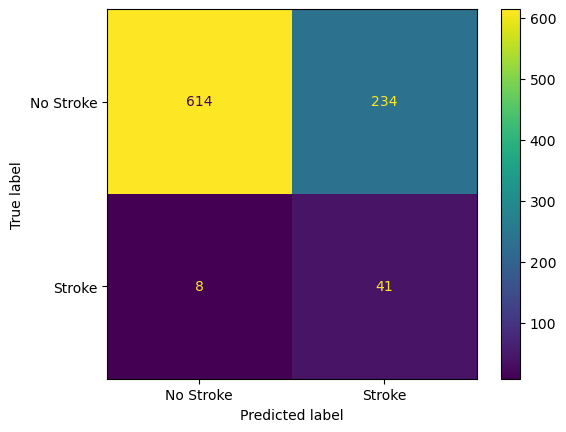

In [67]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler


# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data only to avoid data leakage
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Instantiate SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote_tomek.fit_resample(X_train_resampled, y_train_resampled)

# Create and train the classifier on the resampled data
svm = SVC()
svm.fit(X_resampled, y_resampled)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Compute confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),
display_labels=['No Stroke','Stroke']).plot()


- No major improvement from prior SVM model 

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)

MSE:  0.2697881828316611
RMSE:  0.5194113811148742
R2:  -4.224152868694649


# Gradient boosting machine

In [69]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = encoded_df.drop(columns=['stroke'])  # Features
y = encoded_df['stroke']  # Target variable

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2211,64.00,0,1,211.35,30.7,0,1,0,1,0,1,0,0,0,1,0,1,0,0
4249,23.00,0,0,98.66,28.3,1,0,1,0,0,1,0,0,0,1,1,0,0,0
100,37.00,0,0,217.11,29.1,1,0,0,1,0,1,0,0,0,1,0,0,1,0
12,80.00,1,0,91.02,32.9,1,0,0,1,0,0,1,0,1,0,0,1,0,0
2459,19.00,0,0,76.57,26.6,1,0,1,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,53.00,0,0,159.39,29.2,0,1,0,1,1,0,0,0,1,0,0,0,1,0
466,0.88,0,0,88.11,15.5,1,0,1,0,0,0,0,1,1,0,1,0,0,0
3092,43.00,0,0,62.99,27.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0
3772,53.00,0,0,113.74,31.6,1,0,0,1,0,0,1,0,0,1,0,0,0,1


              precision    recall  f1-score   support

           0       0.98      0.80      0.88       854
           1       0.15      0.70      0.25        43

    accuracy                           0.79       897
   macro avg       0.57      0.75      0.56       897
weighted avg       0.94      0.79      0.85       897



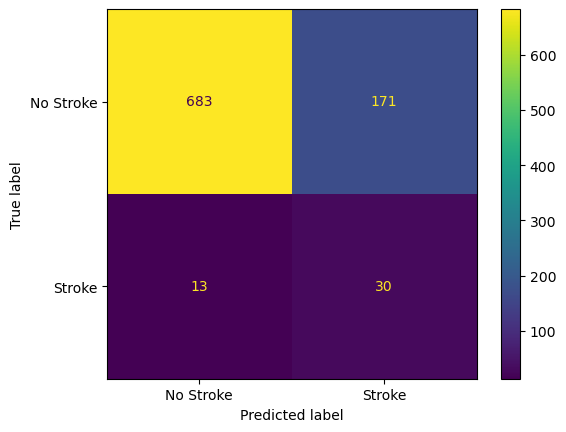

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Instantiate RandomOverSampler for oversampling
oversampler = RandomOverSampler(random_state=42)

# Resample the training data using RandomOverSampler
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Instantiate Gradient Boosting classifier
gbm = GradientBoostingClassifier()

# Train the classifier on the resampled data
gbm.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['No Stroke', 'Stroke']).plot()


- Improved accuracy from SVM model, but the recall rate for postive stroke is not better 

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)

MSE:  0.20512820512820512
RMSE:  0.4529108136578383
R2:  -3.4945264419149282


# Logistical regression

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       854
           1       0.14      0.67      0.23        43

    accuracy                           0.79       897
   macro avg       0.56      0.73      0.55       897
weighted avg       0.94      0.79      0.85       897



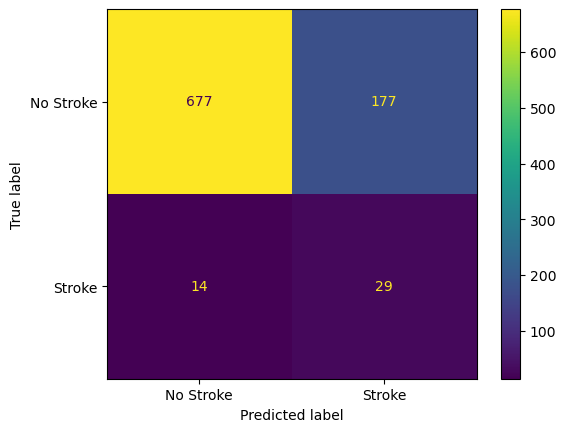

In [73]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate SMOTE for oversampling
smote = SMOTE(random_state=42)

# Instantiate RandomOverSampler for oversampling
oversampler = RandomOverSampler(random_state=42)

# Resample the training data using SMOTE
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

# Resample the training data using RandomOverSampler
X_train_resampled_over, y_train_resampled_over = oversampler.fit_resample(X_train, y_train)

# Combine the resampled datasets
X_train_resampled = np.vstack((X_train_resampled_smote, X_train_resampled_over))
y_train_resampled = np.concatenate((y_train_resampled_smote, y_train_resampled_over))

# Instantiate the logistic regression model
logreg = LogisticRegression()

# Train the model on the resampled training data
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['No Stroke', 'Stroke']).plot()



- Like gradient boosting, the accuracy is better but the recall rate is poorer

# Overall the SVM model is the best overall model, as suggested by its classification scores, its recall rate for the minority class is higher than the others, whilst ensuring the recall rate is good.
## Recall rate is important in this context, since having a false negatve is more detrimental than a false positive, as not noticing a possibility of stroke is far more dangerous.

# Unseen data

In [75]:
unseen_df = pd.read_csv('brain_stroke_unseen.csv')
unseen_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,49.0,0,0,Yes,Private,Rural,56.11,28.7,smokes
1,Male,75.0,0,0,Yes,Private,Rural,75.47,24.5,formerly smoked
2,Female,71.0,0,0,Yes,Private,Rural,100.61,19.2,Unknown
3,Female,12.0,0,0,No,children,Rural,85.97,35.7,Unknown
4,Male,63.0,0,0,Yes,Private,Rural,104.79,24.1,Unknown
...,...,...,...,...,...,...,...,...,...,...
494,Male,79.0,1,0,Yes,Private,Rural,75.02,29.1,never smoked
495,Male,53.0,0,0,Yes,Private,Rural,175.92,26.9,smokes
496,Male,73.0,0,1,Yes,Govt_job,Rural,219.73,28.6,never smoked
497,Female,12.0,0,0,No,children,Urban,82.39,17.1,never smoked


In [76]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create DataFrame
df = pd.DataFrame(unseen_df)

# Instantiate OneHotEncoder
encoder = OneHotEncoder()

# Encode categorical features
encoded_features = encoder.fit_transform(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']), dtype = 'int')

# Concatenate the encoded DataFrame with the original DataFrame
encoded_df = pd.concat([df.drop(columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']), encoded_df], axis=1)

# Display the encoded DataFrame
display(encoded_df)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,49.0,0,0,56.11,28.7,1,0,0,1,0,1,0,0,1,0,0,0,0,1
1,75.0,0,0,75.47,24.5,0,1,0,1,0,1,0,0,1,0,0,1,0,0
2,71.0,0,0,100.61,19.2,1,0,0,1,0,1,0,0,1,0,1,0,0,0
3,12.0,0,0,85.97,35.7,1,0,1,0,0,0,0,1,1,0,1,0,0,0
4,63.0,0,0,104.79,24.1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,79.0,1,0,75.02,29.1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
495,53.0,0,0,175.92,26.9,0,1,0,1,0,1,0,0,1,0,0,0,0,1
496,73.0,0,1,219.73,28.6,0,1,0,1,1,0,0,0,1,0,0,0,1,0
497,12.0,0,0,82.39,17.1,1,0,1,0,0,0,0,1,0,1,0,0,1,0


In [78]:

# Make predictions using the trained SVM model
predictions = svm.predict(encoded_df)

# Display the predictions
print(predictions)


[0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0
 1 0 0 1 1 0 0 0 1 0 0 1 

In [81]:
# Make predictions using the logistic regression
# Export predictions to Excel
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])
predictions_df.to_csv('Jenushan_Jayarooban_brain_stroke_X.csv', index=False)
print(f'Predictions saved to predictions.xlsx')

Predictions saved to predictions.xlsx
